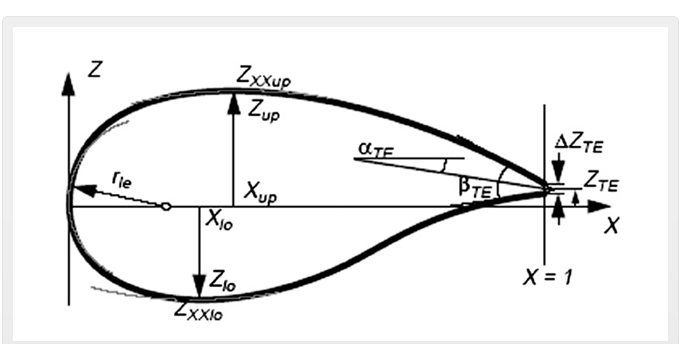

Os parâmetros são: 

- raio do leading edge - **OK**
- upper crest location (X_up, Y_up) - **OK**
- lower crest location (X_low, Y_low) - **OK**
- Espessura máxima, localização da espessura máxima (X_e, y_e) - **OK**
- Área e Centroide - **OK**
- camber máximo (x_c, y_c) - **OK**
- camber médio - **OK**
- comprimento da superfície superior - **OK**
- comprimento da superfície inferior - **OK**
- ângulo no bordo de fuga - **OK**


In [173]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt 
import numpy as np
import aerosandbox as asb
import numpy as np
from scipy.optimize import minimize
from numpy.polynomial import Polynomial


In [214]:
af = asb.Airfoil("ys930")
x = np.linspace(0, 1, 1000)
y_upper = af.local_camber(x) + af.local_thickness(x) / 2
y_lower = af.local_camber(x) - af.local_thickness(x) / 2

# Raio do Leading Edge

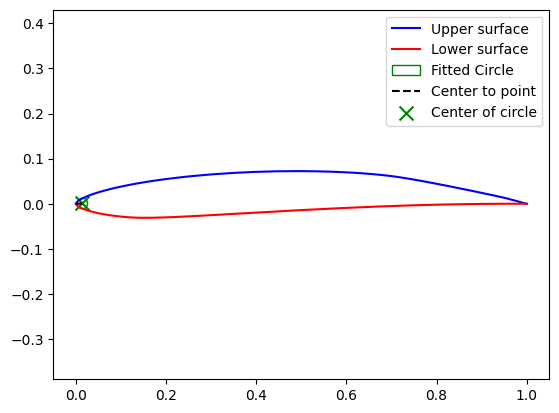

In [215]:
# Extraindo os 10 primeiros pontos do bordo de ataque -> Note que isso foi arbitrário, se quiser pegue mais pontos
x_data = np.concatenate((x[:20], x[:20]))
y_data = np.concatenate((y_upper[:20], y_lower[:20]))

# Circle fit usando least squares
def fit_circle(x, y):
    x_m, y_m = np.mean(x), np.mean(y)
    u = x - x_m
    v = y - y_m
    Suv = sum(u * v)
    Suu = sum(u**2)
    Svv = sum(v**2)
    Suuu = sum(u**3)
    Svvv = sum(v**3)
    Suvv = sum(u * v**2)
    Suuv = sum(u**2 * v)
    
    A = np.array([
        [Suu, Suv],
        [Suv, Svv]
    ])
    B = np.array([
        0.5 * (Suuu + Suvv),
        0.5 * (Svvv + Suuv)
    ])
    
    uc, vc = np.linalg.solve(A, B)
    xc = x_m + uc
    yc = y_m + vc
    r = np.sqrt(uc**2 + vc**2 + (Suu + Svv) / len(x))
    
    return xc, yc, r

# Fit do círculo
xc, yc, r = fit_circle(x_data, y_data)

# Plotting
fig, ax = plt.subplots()
ax.plot(x, y_upper, 'b-', label='Upper surface')
ax.plot(x, y_lower, 'r-', label='Lower surface')
circle = plt.Circle((xc, yc), r, color='g', fill=False, label='Fitted Circle')
ax.add_artist(circle)
ax.plot([xc, x_data[0]], [yc, y_data[0]], 'k--', label='Center to point')
ax.scatter(xc, yc, c='g', s=100, marker='x', label='Center of circle')
ax.axis('equal')
ax.legend()
plt.show()


In [216]:
# Print do raio
print(f"Radius of the leading edge: {r:.5f}")

Radius of the leading edge: 0.01172


# UPPER AND LOWER CREST LOCATION

0.4944944944944945 0.07236915466344972
0.15815815815815815 -0.03122776920425814


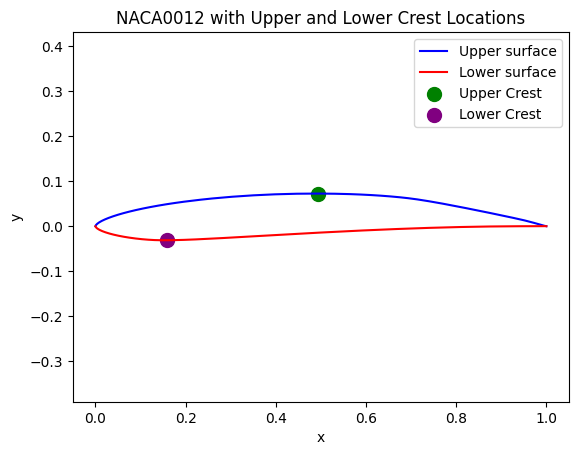

In [217]:
# Upper crest location
index_max_y_upper = np.argmax(y_upper)
x_upper_crest = x[index_max_y_upper]
y_upper_crest = y_upper[index_max_y_upper]

# Lower crest location
index_min_y_lower = np.argmin(y_lower)
x_lower_crest = x[index_min_y_lower]
y_lower_crest = y_lower[index_min_y_lower]

print(x_upper_crest, y_upper_crest)
print(x_lower_crest, y_lower_crest)

# Plot
fig, ax = plt.subplots()
ax.plot(x, y_upper, 'b-', label='Upper surface')
ax.plot(x, y_lower, 'r-', label='Lower surface')

# Mark the upper and lower crest locations
ax.scatter(x_upper_crest, y_upper_crest, c='g', s=100, marker='o', label='Upper Crest')
ax.scatter(x_lower_crest, y_lower_crest, c='purple', s=100, marker='o', label='Lower Crest')

ax.axis('equal')
ax.legend()
plt.title("NACA0012 with Upper and Lower Crest Locations")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# ESPESSURA MÁXIMA E SUA LOCALIZAÇÃO

Maximum thickness: 0.09091
Location of maximum thickness (x-coordinate): 0.34935


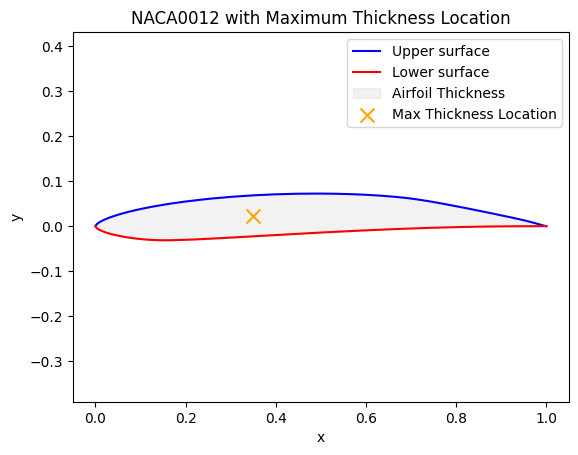

In [218]:
# Espessura por todo o airfoil
thickness = y_upper - y_lower

# Localização e espessura máxima
index_max_thickness = np.argmax(thickness)
x_max_thickness = x[index_max_thickness]
max_thickness = thickness[index_max_thickness]

# Print 
print(f"Maximum thickness: {max_thickness:.5f}")
print(f"Location of maximum thickness (x-coordinate): {x_max_thickness:.5f}")

# Plot
fig, ax = plt.subplots()
ax.plot(x, y_upper, 'b-', label='Upper surface')
ax.plot(x, y_lower, 'r-', label='Lower surface')
ax.fill_between(x, y_upper, y_lower, color='gray', alpha=0.1, label='Airfoil Thickness')

# Localização de máxima espessura
ax.scatter(x_max_thickness, (y_upper[index_max_thickness] + y_lower[index_max_thickness])/2, c='orange', s=100, marker='x', label='Max Thickness Location')

ax.axis('equal')
ax.legend()
plt.title("NACA0012 with Maximum Thickness Location")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# MAXIMUM CAMBER E LOCALIZAÇÃO + CAMBER MÉDIO

Maximum camber: 0.03027
Location of maximum camber (x-coordinate): 0.59159
Mean camber: 0.01844


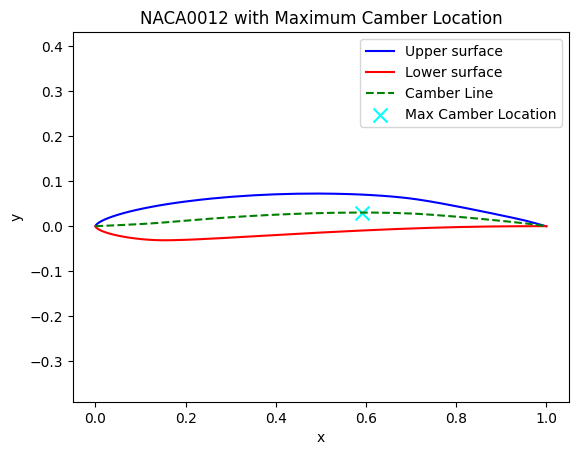

In [219]:
# Valores de camber
camber = af.local_camber(x)

# Localização e valor do camber máximo
index_max_camber = np.argmax(np.abs(camber))
x_max_camber = x[index_max_camber]
max_camber = camber[index_max_camber]

# Print 
print(f"Maximum camber: {max_camber:.5f}")
print(f"Location of maximum camber (x-coordinate): {x_max_camber:.5f}")

# Camber médio
mean_camber = np.mean(camber)
print(f"Mean camber: {mean_camber:.5f}")

# Plotting
fig, ax = plt.subplots()
ax.plot(x, y_upper, 'b-', label='Upper surface')
ax.plot(x, y_lower, 'r-', label='Lower surface')
ax.plot(x, camber, 'g--', label='Camber Line')

# Localização de máximo camber
ax.scatter(x_max_camber, camber[index_max_camber], c='cyan', s=100, marker='x', label='Max Camber Location')

ax.axis('equal')
ax.legend()
plt.title("NACA0012 with Maximum Camber Location")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# COMPRIMENTO DOS ARCOS

In [220]:
# Diferença entre dois pontos consecutivos
delta_x = np.diff(x)
delta_y_upper = np.diff(y_upper)
delta_y_lower = np.diff(y_lower)

# Comprimento do arco para cada segmento
arc_length_upper_segments = np.sqrt(delta_x**2 + delta_y_upper**2)
arc_length_lower_segments = np.sqrt(delta_x**2 + delta_y_lower**2)

# Soma dos segmentos pra conseguir o total
length_upper_surface = np.sum(arc_length_upper_segments)
length_lower_surface = np.sum(arc_length_lower_segments)

# Print
print(f"Length of upper surface: {length_upper_surface:.5f}")
print(f"Length of lower surface: {length_lower_surface:.5f}")

Length of upper surface: 1.01796
Length of lower surface: 1.00680


# ÁREA e CENTROIDE

In [221]:
# Área
A = np.trapz(y_upper - y_lower, x)

# Coordenada x do centroide
x_centroid = np.trapz(x * (y_upper - y_lower), x) / A

# Coordenada y do centroide
y_centroid = np.trapz((y_upper**2 - y_lower**2), x) / (2 * A)

print(f"Centroid is located at ({x_centroid:.4f}, {y_centroid:.4f})")

print(A)

Centroid is located at (0.4392, 0.0208)
0.06495243852298349


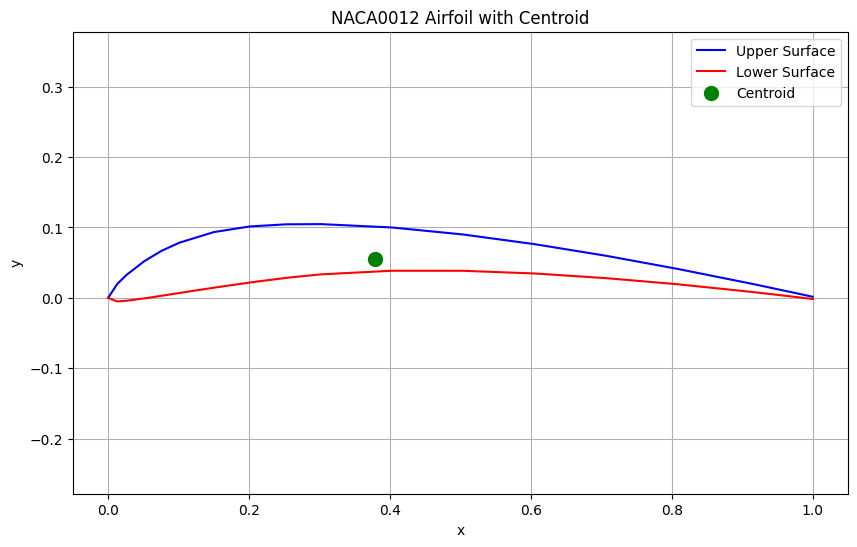

In [212]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y_upper, 'b-', label='Upper Surface')
plt.plot(x, y_lower, 'r-', label='Lower Surface')
plt.scatter(x_centroid, y_centroid, color='g', marker='o', s=100, label='Centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NACA0012 Airfoil with Centroid')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()







# ÂNGULO NO BORDO DE FUGA

0.27400758121202606


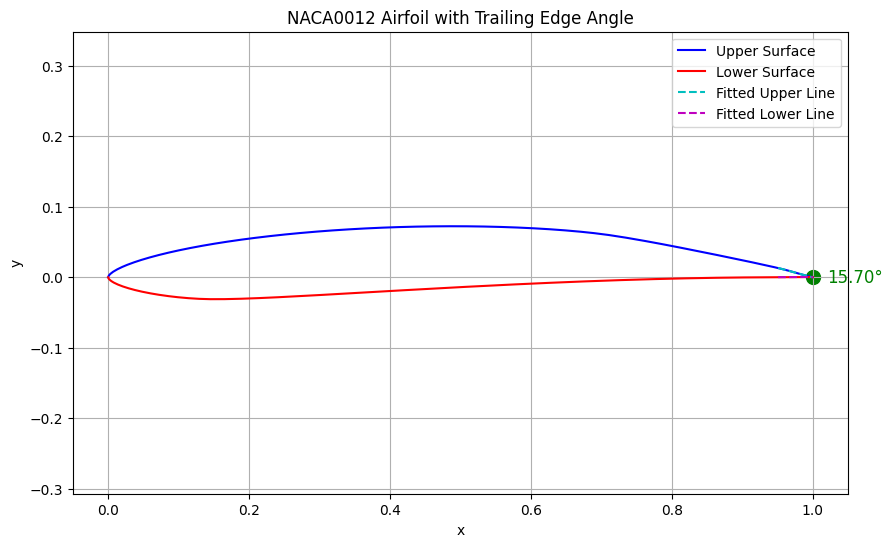

In [222]:
from numpy.polynomial import Polynomial

# 50 últimos pontos
x_tail = x[-50:]
y_upper_tail = y_upper[-50:]
y_lower_tail = y_lower[-50:]

# Fittando esses últimos pontos usando regressão linear
p_upper = Polynomial.fit(x_tail, y_upper_tail, 1)
p_lower = Polynomial.fit(x_tail, y_lower_tail, 1)

# Pegando inclinação dessa linha
m_upper = p_upper.convert().coef[1]
m_lower = p_lower.convert().coef[1]

# Ângulo entre as linhas
angle_rad = np.arctan(abs((m_upper - m_lower) / (1 + m_upper * m_lower)))
angle_deg = np.degrees(angle_rad)
print(angle_rad)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y_upper, 'b-', label='Upper Surface')
plt.plot(x, y_lower, 'r-', label='Lower Surface')
plt.plot(x_tail, p_upper(x_tail), 'c--', label='Fitted Upper Line')
plt.plot(x_tail, p_lower(x_tail), 'm--', label='Fitted Lower Line')
plt.scatter(x[-1], (y_upper[-1] + y_lower[-1]) / 2, color='green', marker='o', s=100)
plt.text(x[-1] + 0.02, (y_upper[-1] + y_lower[-1]) / 2, f'{angle_deg:.2f}°', color='green', fontsize=12, verticalalignment='center')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NACA0012 Airfoil with Trailing Edge Angle')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# GENERALIZANDO

In [161]:
df = pd.read_excel(r'C:\Users\Rafael\Downloads\airfoil_data_to_derivate.xlsx')

In [168]:
def initialize_airfoil(airfoil_name):
    af = asb.Airfoil(airfoil_name)
    x = np.linspace(0, 1, 1000)
    y_upper = af.local_camber(x) + af.local_thickness(x) / 2
    y_lower = af.local_camber(x) - af.local_thickness(x) / 2
    return x, y_upper, y_lower

In [169]:
def fit_circle_from_bounds(X, y_upper, y_lower):
    # Extracting the first 20 points from upper and lower surface
    x_data = np.concatenate((X[:20], X[:20]))
    y_data = np.concatenate((y_upper[:20], y_lower[:20]))
    
    # Circle fit using least squares
    def fit_circle(x, y):
        x_m, y_m = np.mean(x), np.mean(y)
        u = x - x_m
        v = y - y_m
        Suv = sum(u * v)
        Suu = sum(u**2)
        Svv = sum(v**2)
        Suuu = sum(u**3)
        Svvv = sum(v**3)
        Suvv = sum(u * v**2)
        Suuv = sum(u**2 * v)
        
        A = np.array([
            [Suu, Suv],
            [Suv, Svv]
        ])
        B = np.array([
            0.5 * (Suuu + Suvv),
            0.5 * (Svvv + Suuv)
        ])
        
        uc, vc = np.linalg.solve(A, B)
        xc = x_m + uc
        yc = y_m + vc
        r = np.sqrt(uc**2 + vc**2 + (Suu + Svv) / len(x))
        
        return r

    return fit_circle(x_data, y_data)

In [170]:
def find_crests(X, y_upper, y_lower):
    # Find the upper crest location
    index_max_y_upper = np.argmax(y_upper)
    x_upper_crest = X[index_max_y_upper]
    y_upper_crest = y_upper[index_max_y_upper]

    # Find the lower crest location
    index_min_y_lower = np.argmin(y_lower)
    x_lower_crest = X[index_min_y_lower]
    y_lower_crest = y_lower[index_min_y_lower]

    return x_upper_crest, y_upper_crest, x_lower_crest, y_lower_crest

In [171]:
def find_max_thickness(X, y_upper, y_lower):
    # Calculate the thickness along the airfoil
    thickness = y_upper - y_lower

    # Find the location and value of maximum thickness
    index_max_thickness = np.argmax(thickness)
    x_max_thickness = X[index_max_thickness]
    max_thickness = thickness[index_max_thickness]

    return max_thickness, x_max_thickness

In [172]:
def compute_arc_lengths(x, y_upper, y_lower):
    # Compute the differences between consecutive data points
    delta_x = np.diff(x)
    delta_y_upper = np.diff(y_upper)
    delta_y_lower = np.diff(y_lower)

    # Compute the arc length for each segment
    arc_length_upper_segments = np.sqrt(delta_x**2 + delta_y_upper**2)
    arc_length_lower_segments = np.sqrt(delta_x**2 + delta_y_lower**2)

    # Sum the segments to get the total arc length
    length_upper_surface = np.sum(arc_length_upper_segments)
    length_lower_surface = np.sum(arc_length_lower_segments)
    
    return length_upper_surface, length_lower_surface

In [174]:
def compute_area_and_centroid(x, y_upper, y_lower):
    # Calculate the area
    A = np.trapz(y_upper - y_lower, x)

    # Calculate the x-coordinate of the centroid
    x_centroid = np.trapz(x * (y_upper - y_lower), x) / A

    # Calculate the y-coordinate of the centroid
    y_centroid = np.trapz((y_upper**2 - y_lower**2), x) / (2 * A)

    return A, x_centroid, y_centroid


In [189]:
def trailing_edge_angle(x, y_upper, y_lower):
    # Extract the last 50 points from upper and lower surfaces
    x_tail = x[-50:]
    y_upper_tail = y_upper[-50:]
    y_lower_tail = y_lower[-50:]

    # Fit lines to these points using linear regression (Polynomial of degree 1)
    p_upper = Polynomial.fit(x_tail, y_upper_tail, 1)
    p_lower = Polynomial.fit(x_tail, y_lower_tail, 1)

    # Ensure the polynomials are of degree 1 (linear) and retrieve their slopes
    m_upper = p_upper.convert().coef[1] if len(p_upper.convert().coef) > 1 else 0
    m_lower = p_lower.convert().coef[1] if len(p_lower.convert().coef) > 1 else 0

    # Calculate the angle between the lines using the formula for the angle between two lines with slopes m1 and m2
    angle_rad = np.arctan(abs((m_upper - m_lower) / (1 + m_upper * m_lower)))
    return angle_rad


In [180]:
def find_camber_parameters(x, af):
    # Calculate the camber values along the airfoil
    camber = af.local_camber(x)

    # Find the location and value of maximum camber
    index_max_camber = np.argmax(np.abs(camber))
    x_max_camber = x[index_max_camber]
    max_camber = camber[index_max_camber]

    # Calculate mean camber
    mean_camber = np.mean(camber)
    
    return max_camber, x_max_camber, mean_camber

# Usage example:
# x = <Your x data array>
# af = <Your airfoil object>
# max_camber, x_max_camber_loc, mean_camber_value = find_camber_parameters(x, af)
# print(f"Maximum camber: {max_camber:.5f}")
# print(f"Location of maximum camber (x-coordinate): {x_max_camber_loc:.5f}")
# print(f"Mean camber: {mean_camber_value:.5f}")


In [190]:
def get_airfoil_parameters(af_name):
    af = asb.Airfoil(af_name)
    x = np.linspace(0, 1, 1000)
    y_upper = af.local_camber(x) + af.local_thickness(x) / 2
    y_lower = af.local_camber(x) - af.local_thickness(x) / 2

    # Compute parameters
    max_thickness, x_max_thickness = find_max_thickness(x, y_upper, y_lower)
    max_camber, x_max_camber, mean_camber = find_camber_parameters(x, af)
    upper_surface_length, lower_surface_length = compute_arc_lengths(x, y_upper, y_lower)
    area, x_centroid, y_centroid = compute_area_and_centroid(x, y_upper, y_lower)
    angle = trailing_edge_angle(x, y_upper, y_lower)
    x_upper_crest, y_upper_crest, x_lower_crest, y_lower_crest = find_crests(x, y_upper, y_lower)
    r = fit_circle_from_bounds(x, y_upper, y_lower)

    return {
        'Airfoil': af_name,
        'Max Thickness': max_thickness,
        'X Max Thickness': x_max_thickness,
        'Max Camber': max_camber,
        'X Max Camber': x_max_camber,
        'Mean Camber': mean_camber,
        'Upper Surface Length': upper_surface_length,
        'Lower Surface Length': lower_surface_length,
        'Area': area,
        'X Centroid': x_centroid,
        'Y Centroid': y_centroid,
        'Trailing Edge Angle': angle,
        'X Upper Crest': x_upper_crest,
        'Y Upper Crest': y_upper_crest,
        'X Lower Crest': x_lower_crest,
        'Y Lower Crest': y_lower_crest,
        'Circle Radius': r
    }


In [191]:
results = []
for af_name in df['AIRFOIL_NAME']:
    parameters = get_airfoil_parameters(af_name)
    results.append(parameters)

results_df = pd.DataFrame(results)
print(results_df)

       Airfoil  Max Thickness  X Max Thickness  Max Camber  X Max Camber  \
0        2032c       0.079589         0.199199    0.069348      0.399399   
1          a18       0.073438         0.299299    0.050363      0.449449   
2        a18sm       0.072829         0.271271    0.038420      0.492492   
3     a63a108c       0.077348         0.300300    0.005505      0.649650   
4         ag03       0.062368         0.256256    0.020246      0.319319   
...        ...            ...              ...         ...           ...   
1507     wb140       0.139250         0.344344    0.036949      0.450450   
1508  whitcomb       0.109596         0.350350    0.022898      0.824825   
1509     ys900       0.090060         0.525526    0.000000      0.000000   
1510     ys915       0.090943         0.360360    0.017573      0.656657   
1511     ys930       0.090906         0.349349    0.030272      0.591592   

      Mean Camber  Upper Surface Length  Lower Surface Length      Area  \
0        0.0

In [192]:
results_df.to_excel("PARSEC.xlsx", index=False, engine='openpyxl')